In [14]:
pip freeze > model_requirements.txt    

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_train_df = pd.read_csv("data_train_csv")
data_smauto_train_df = pd.read_csv("data_smauto_train_csv")
data_smin_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [17]:
print(f'Data_train: {data_train_df.shape}, Data smauto: {data_smauto_train_df.shape}, Data smin: {data_smin_train_df.shape}')

Data_train: (192638, 10), Data smauto: (293598, 10), Data smin: (288041, 10)


In [18]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [19]:
print(data_train_df['Winner_num'].value_counts())
print(data_smauto_train_df['Winner_num'].value_counts())
print(data_smin_train_df['Winner_num'].value_counts())

Winner_num
0    97866
2    92309
1     2463
Name: count, dtype: int64
Winner_num
0    97866
2    97866
1    97866
Name: count, dtype: int64
Winner_num
0    97866
1    97866
2    92309
Name: count, dtype: int64


Random Forest model

Train the baseline RF classifier

NOTE: Should I turn this into a function to call here and at the end?

In [20]:
def rf(train_data, test_data, val_data, sample, proportion):
    #own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
    from data_formatting import data_format
    X_train, X_test, X_val, y_train, y_test, y_val = data_format(train_data, test_data, val_data, sample, proportion)

    model = RandomForestClassifier(random_state=7)
    model.fit(X_train, y_train)

    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"Training score: {model_train_score}, Testing score: {model_test_score}" )

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Team 1', 'Tie', 'Team 2'])

    cmd.plot()
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    print(classification_report(y_test, y_pred))

Training score: 0.9700007267517312, Testing score: 0.9265043298053438


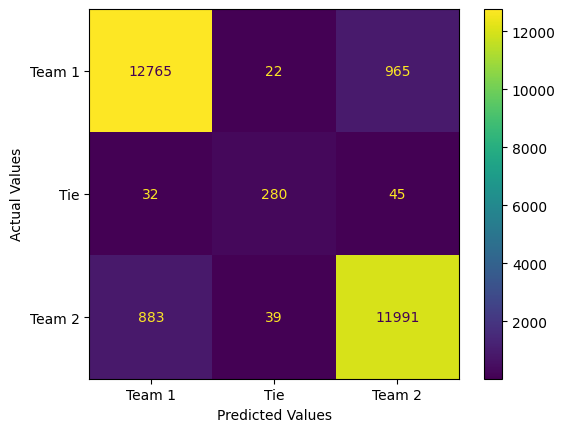

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13752
           1       0.82      0.78      0.80       357
           2       0.92      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.88      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [21]:
rf(data_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9803098113747369, Testing score: 0.9293168529346458


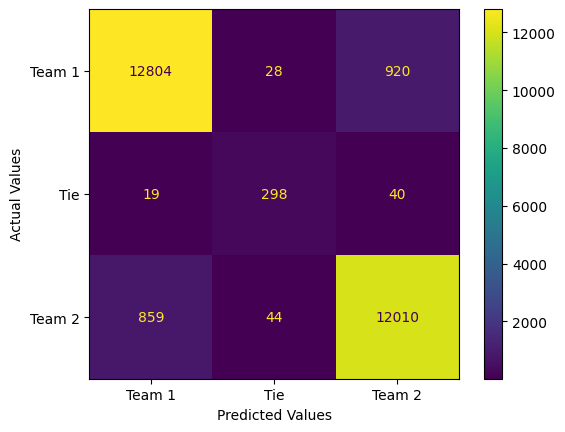

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.81      0.83      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [22]:
rf(data_smauto_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9799334122572828, Testing score: 0.9297979424172896


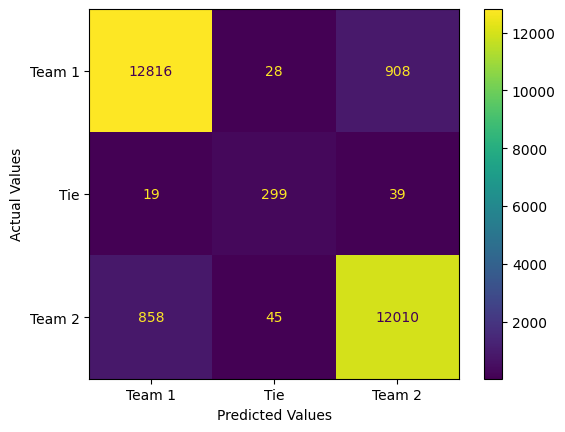

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.80      0.84      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [23]:
rf(data_smin_train_df, data_test_df, data_val_df, None, None)

Using min because recall is the more importantmetric in this case. Recall is the number of true positives/ true positives + False negatives.  I.e. out of the number of times it was actually positive, how many times did we predict it to be so.  Not as much of a concern for false negatives in category 1 because it has less impact than incorrectly giving the win to another team.

<ins>**Tune the RF**</ins>

Because I'm using the full data, chosen to train on each parameter in turn and plot results.  In other models, chose to run the combinations but I used a sample of the data instead.

In [24]:
X_train, X_test, X_val, y_train, y_test, y_val = data_format(data_smin_train_df, data_test_df, data_val_df, None, None)

In [34]:
#Tuning on Estimators as well as the below

param_grid = {
    'max_depth': [10, 20, 30, 40 ,50, 60, 70, 80, 90, 100],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    'criterion': ["gini", "entropy", "log_loss"]
    }

Max Depth

10 max depth, Train Accuracy: 0.8512503428331384, Validation Accuracy: 0.7790729947266167
20 max depth, Train Accuracy: 0.9771733885106634, Validation Accuracy: 0.9392728281987233
30 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9320751225830327
40 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9314275141086132
50 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736
60 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736
70 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736
80 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736
90 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736
100 max depth, Train Accuracy: 0.9799334122572828, Validation Accuracy: 0.9316310482005736


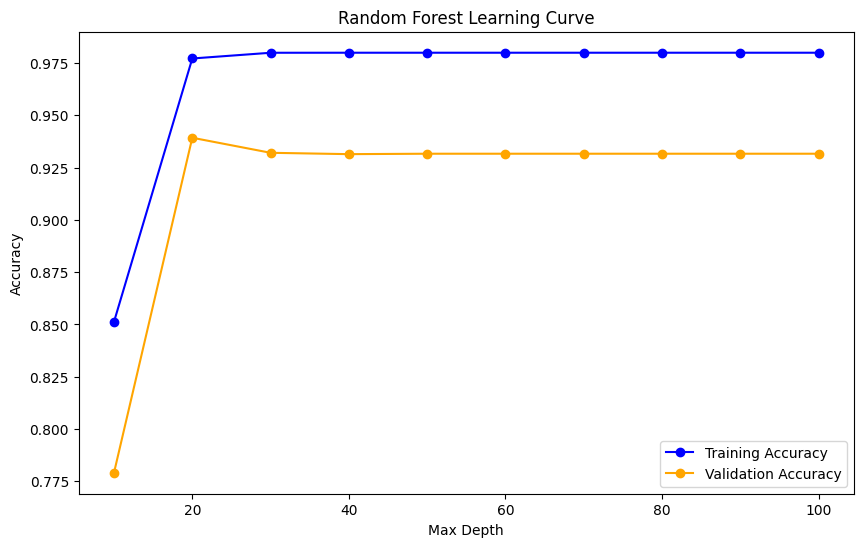

In [ ]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in param_grid['max_depth']:
    depth_list.append(md)

    model = RandomForestClassifier(max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_depth= md

print(f"Best validation accuracy is: {best_accuracy} and depth is {best_depth}")

depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

#Fine tuning max depth

15 max depth, Train Accuracy: 0.9455285879440775, Validation Accuracy: 0.9100379313535018
16 max depth, Train Accuracy: 0.9570061206564343, Validation Accuracy: 0.924877416967342
17 max depth, Train Accuracy: 0.96498762328974, Validation Accuracy: 0.9336293829216393
18 max depth, Train Accuracy: 0.9706465399023055, Validation Accuracy: 0.9385142011286891
19 max depth, Train Accuracy: 0.9746529139948826, Validation Accuracy: 0.9401239707651031
20 max depth, Train Accuracy: 0.9771733885106634, Validation Accuracy: 0.9392728281987233
21 max depth, Train Accuracy: 0.978437097496537, Validation Accuracy: 0.9379035988528078
22 max depth, Train Accuracy: 0.9789856305178777, Validation Accuracy: 0.9364048478120085
23 max depth, Train Accuracy: 0.9793744640519926, Validation Accuracy: 0.9352206494587844
24 max depth, Train Accuracy: 0.9796174850108145, Validation Accuracy: 0.9343510037931354
Best validation accuracy is: 0.9401239707651031 and depth is 19


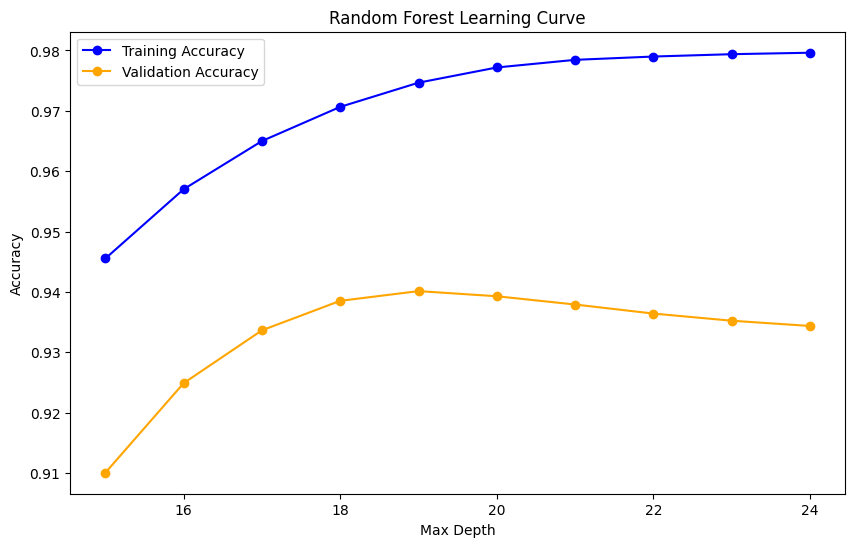

In [37]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in range(1, 40):
    depth_list.append(md)

    model = RandomForestClassifier(max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_depth= md

print(f"Best validation accuracy is: {best_accuracy} and depth is {best_depth}")
depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Min Samples Leaf

1 min samples leaf, Train Accuracy: 0.9746529139948826, Validation Accuracy: 0.9401239707651031
100 min samples leaf, Train Accuracy: 0.8713967803194684, Validation Accuracy: 0.810287723193635
200 min samples leaf, Train Accuracy: 0.8433348030315129, Validation Accuracy: 0.7700804884818208
300 min samples leaf, Train Accuracy: 0.8306317503410973, Validation Accuracy: 0.7525580534739569
400 min samples leaf, Train Accuracy: 0.8188278751983225, Validation Accuracy: 0.7375705430659636
500 min samples leaf, Train Accuracy: 0.8133460167128985, Validation Accuracy: 0.7298362475714683
Best validation accuracy is: 0.9401239707651031 and min samples leaf is 1


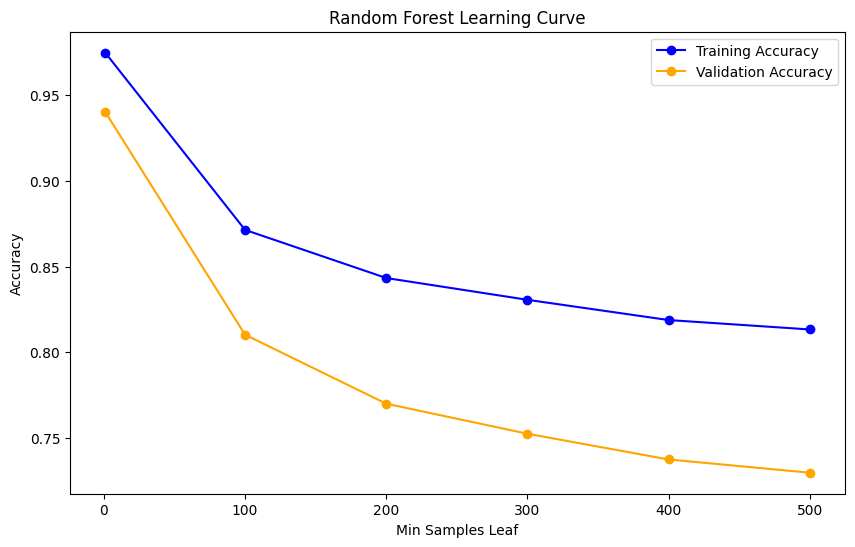

In [38]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in param_grid['min_samples_leaf']:
    msl_list.append(msl)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_msl= msl

print(f"Best validation accuracy is: {best_accuracy} and min samples leaf is {best_msl}")

msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Fine tuning Min Samples Leaf

1 min samples leaf, Train Accuracy: 0.9746529139948826, Validation Accuracy: 0.9401239707651031
2 min samples leaf, Train Accuracy: 0.9729864845629616, Validation Accuracy: 0.9410121195300213
3 min samples leaf, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
4 min samples leaf, Train Accuracy: 0.969834155554244, Validation Accuracy: 0.9411416412249052
5 min samples leaf, Train Accuracy: 0.9683135386976159, Validation Accuracy: 0.9394763622906837
6 min samples leaf, Train Accuracy: 0.9676851559326624, Validation Accuracy: 0.9390137848089555
7 min samples leaf, Train Accuracy: 0.9656611385184748, Validation Accuracy: 0.9369414376908132
8 min samples leaf, Train Accuracy: 0.9640190111824358, Validation Accuracy: 0.9349245998704783
9 min samples leaf, Train Accuracy: 0.9621477497995077, Validation Accuracy: 0.9324266814691461
10 min samples leaf, Train Accuracy: 0.9608146062539707, Validation Accuracy: 0.9316310482005736
11 min samples leaf, Train Accuracy: 0.95

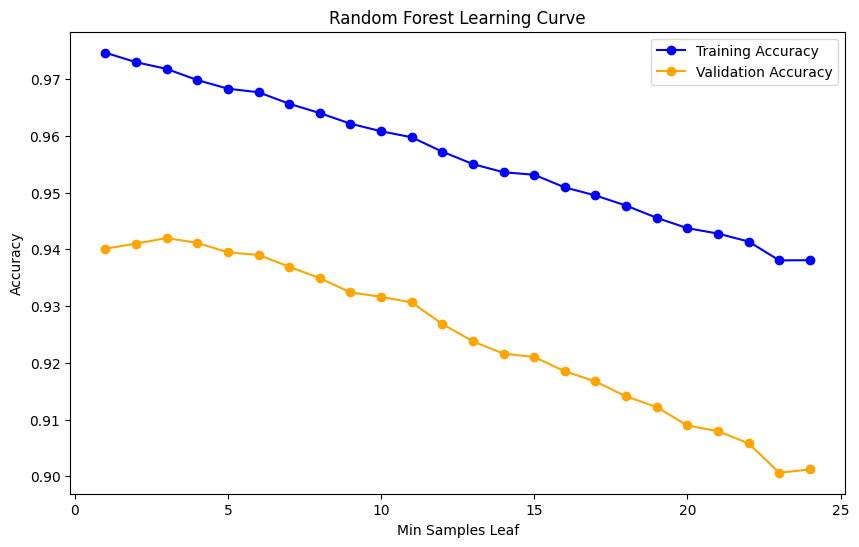

In [42]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in range(1,25):
    msl_list.append(msl)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_msl= msl

print(f"Best validation accuracy is: {best_accuracy} and min samples leaf is {best_msl}")
msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Chose 11 because whilst it's not the highest validation accuracy it is the closest to the training accuracy and still high

Min samples split

10 min sample, Train Accuracy: 0.9710666189882691, Validation Accuracy: 0.9416782311037099
50 min sample, Train Accuracy: 0.9560999996528272, Validation Accuracy: 0.9269312609862151
100 min sample, Train Accuracy: 0.9375852743185866, Validation Accuracy: 0.9015080025904338
200 min sample, Train Accuracy: 0.9100753017799549, Validation Accuracy: 0.8634656304931076
Best validation accuracy is: 0.9416782311037099 and min samples split is 10


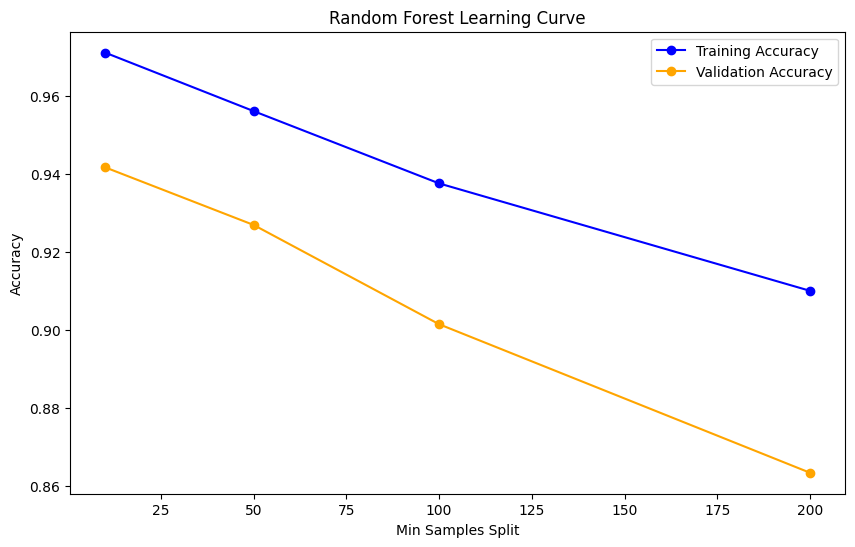

In [43]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in param_grid['min_samples_split']:
    mss_list.append(mss)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mss= mss

print(f"Best validation accuracy is: {best_accuracy} and min samples split is {best_mss}")    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

2 min sample, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
3 min sample, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
4 min sample, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
5 min sample, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
6 min sample, Train Accuracy: 0.9718026253207008, Validation Accuracy: 0.941992783791285
7 min sample, Train Accuracy: 0.9709867692446561, Validation Accuracy: 0.9417892496993246
8 min sample, Train Accuracy: 0.9711291100919661, Validation Accuracy: 0.941400684614673
9 min sample, Train Accuracy: 0.970920806412976, Validation Accuracy: 0.9421778147839763
10 min sample, Train Accuracy: 0.9710666189882691, Validation Accuracy: 0.9416782311037099
11 min sample, Train Accuracy: 0.9708791456771779, Validation Accuracy: 0.9421223054861689
12 min sample, Train Accuracy: 0.9703722733916352, Validation Accuracy: 0.9411231381256361
13 min sample,

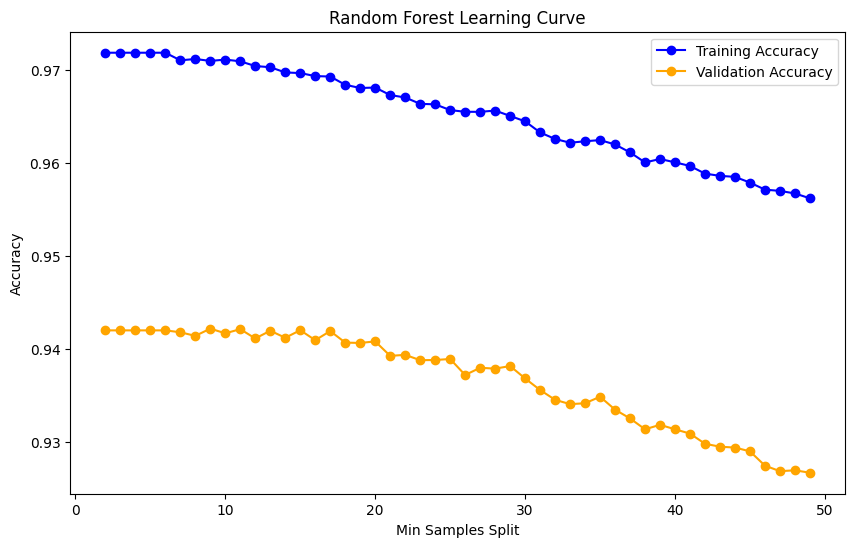

In [45]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in range(2,50):
    mss_list.append(mss)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mss= mss

print(f"Best validation accuracy is: {best_accuracy} and min samples split is {best_mss}")    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Choosing 14 because the larger the number of samples the less likely to overfit

Criterion

gini criterion, Train Accuracy: 0.970920806412976, Validation Accuracy: 0.9421778147839763
entropy criterion, Train Accuracy: 0.9706395964463392, Validation Accuracy: 0.9426773984642428
log_loss criterion, Train Accuracy: 0.9706395964463392, Validation Accuracy: 0.9426773984642428
Best validation accuracy is: 0.9426773984642428 and criterion is entropy


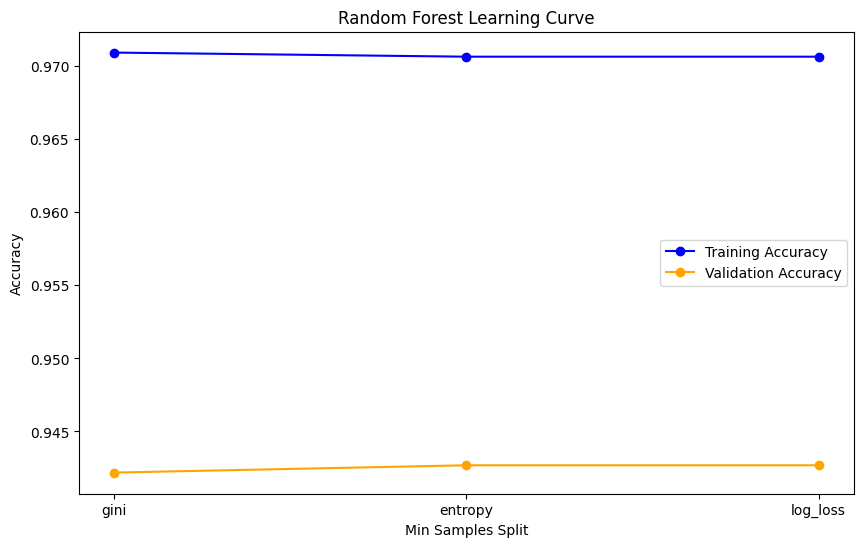

In [47]:
best_accuracy = 0
criteria_list = []
train_acc_list = []
val_acc_list = []
for c in param_grid['criterion']:
    criteria_list.append(c)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,criterion=c, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{c} criterion, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_c= c

print(f"Best validation accuracy is: {best_accuracy} and criterion is {best_c}")    
c_df = pd.DataFrame({'Criteria': criteria_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(c_df['Criteria'], c_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(c_df['Criteria'], c_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Number of Estimators

1 n_estimators, Train Accuracy: 0.9272117511048774, Validation Accuracy: 0.8749560551392358
6 n_estimators, Train Accuracy: 0.9676990428445951, Validation Accuracy: 0.9363678416134703
11 n_estimators, Train Accuracy: 0.9686502963119834, Validation Accuracy: 0.9387732445184569
16 n_estimators, Train Accuracy: 0.9689974691103003, Validation Accuracy: 0.9393468405957998
21 n_estimators, Train Accuracy: 0.969587662867439, Validation Accuracy: 0.9401239707651031
26 n_estimators, Train Accuracy: 0.9694765675719776, Validation Accuracy: 0.9403645110556018
31 n_estimators, Train Accuracy: 0.9699799681295371, Validation Accuracy: 0.9405125358497548
36 n_estimators, Train Accuracy: 0.9705389163348274, Validation Accuracy: 0.9420852992876306
41 n_estimators, Train Accuracy: 0.9707958242055819, Validation Accuracy: 0.9423628457766676
46 n_estimators, Train Accuracy: 0.9708166545734809, Validation Accuracy: 0.9430289573503562
51 n_estimators, Train Accuracy: 0.9708027676615482, Validation Accuracy:

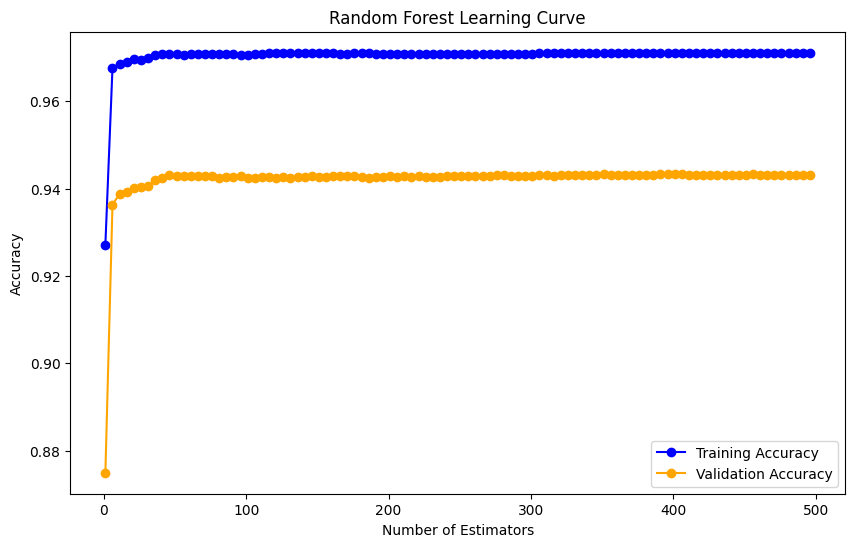

In [48]:
best_accuracy = 0
estimators = []
train_acc_list = []
val_acc_list = []
for e in range(1,300, 5):
    estimators.append(e)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,criterion='entropy', n_estimators=e, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{e} n_estimators, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_estimators = e
    
estimators_df = pd.DataFrame({'Estimators': estimators,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best validation accuracy is: {best_accuracy} and estimators is {best_estimators}")

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(estimators_df['Estimators'], estimators_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(estimators_df['Estimators'], estimators_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

1 n_estimators, Train Accuracy: 0.9272117511048774, Validation Accuracy: 0.8749560551392358
2 n_estimators, Train Accuracy: 0.956096527924844, Validation Accuracy: 0.918049773337034
3 n_estimators, Train Accuracy: 0.9625400550616058, Validation Accuracy: 0.9283745027292072
4 n_estimators, Train Accuracy: 0.9650119253856222, Validation Accuracy: 0.9333888426311407
5 n_estimators, Train Accuracy: 0.9669248475043484, Validation Accuracy: 0.9351096308631696
6 n_estimators, Train Accuracy: 0.9676990428445951, Validation Accuracy: 0.9363678416134703
7 n_estimators, Train Accuracy: 0.9678101381400565, Validation Accuracy: 0.9358312517346655
8 n_estimators, Train Accuracy: 0.9678656857877872, Validation Accuracy: 0.9363678416134703
9 n_estimators, Train Accuracy: 0.9680566308268614, Validation Accuracy: 0.9377555740586548
10 n_estimators, Train Accuracy: 0.9686294659440844, Validation Accuracy: 0.9384216856323434
11 n_estimators, Train Accuracy: 0.9686502963119834, Validation Accuracy: 0.93877

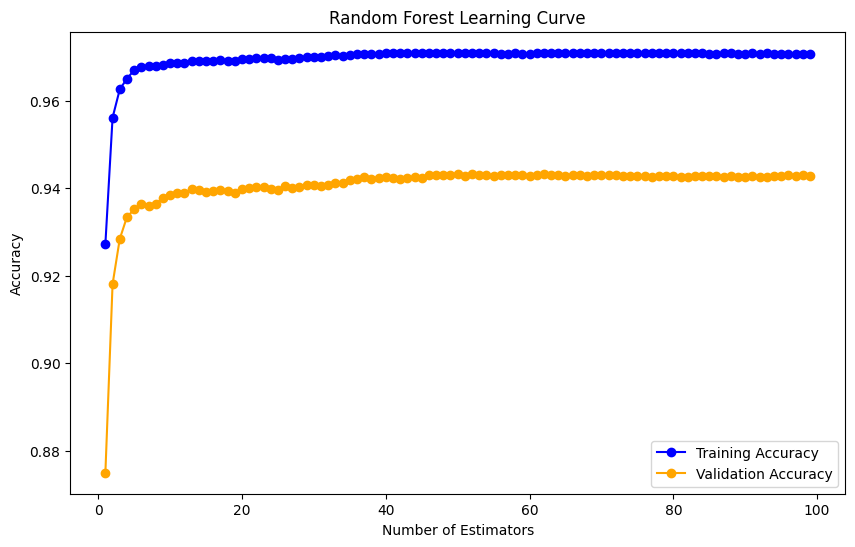

In [49]:
best_accuracy = 0
estimators = []
train_acc_list = []
val_acc_list = []
for e in range(1, 100):
    estimators.append(e)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,criterion='entropy', n_estimators=e, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{e} n_estimators, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_estimators = e
    
estimators_df = pd.DataFrame({'Estimators': estimators,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best validation accuracy is: {best_accuracy} and estimators is {best_estimators}")

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(estimators_df['Estimators'], estimators_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(estimators_df['Estimators'], estimators_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Max Features

1 max features, Train Accuracy: 0.9621130325196761, Validation Accuracy: 0.9244148394856139
2 max features, Train Accuracy: 0.9706083508944907, Validation Accuracy: 0.9429179387547414
3 max features, Train Accuracy: 0.9726983311403585, Validation Accuracy: 0.9461004718290313
4 max features, Train Accuracy: 0.9731322971382547, Validation Accuracy: 0.9468961050976038
5 max features, Train Accuracy: 0.9728788609954833, Validation Accuracy: 0.9465630493107595
6 max features, Train Accuracy: 0.9727712374280051, Validation Accuracy: 0.9466555648071052
7 max features, Train Accuracy: 0.9701882718085273, Validation Accuracy: 0.9447127393838468
8 max features, Train Accuracy: 0.9590613836224704, Validation Accuracy: 0.9293551669904709
Best validation accuracy is: 0.9468961050976038 and max features is 4


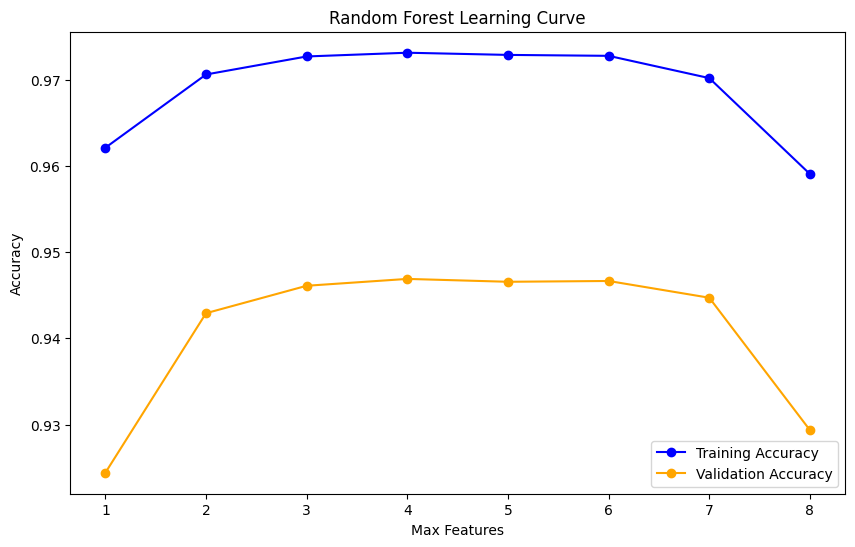

In [53]:
best_accuracy = 0
maxfeatures_list = []
train_acc_list = []
val_acc_list = []
for mf in range(1,9):
    maxfeatures_list.append(mf)

    model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,criterion='entropy', n_estimators=98, max_features=mf, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mf} max features, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mf= mf

print(f"Best validation accuracy is: {best_accuracy} and max features is {best_mf}")
mf_df = pd.DataFrame({'Max Features': maxfeatures_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.plot(mf_df['Max Features'], mf_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mf_df['Max Features'], mf_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [58]:
    
model = RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,criterion='entropy', n_estimators=98, max_features=4, n_jobs=-1, random_state=7)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9731322971382547, Validation Accuracy: 0.9468961050976038, Test Accuracy: 0.9412700762341796


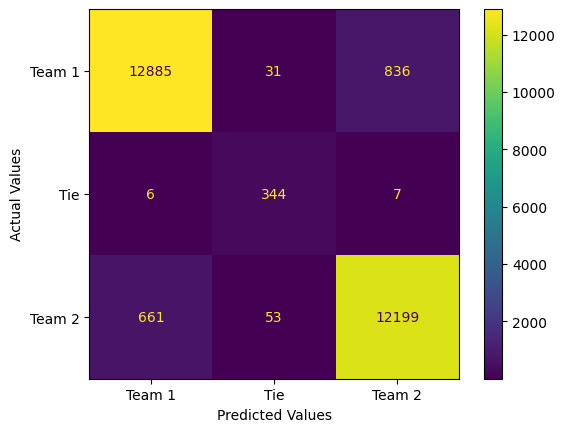

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13752
           1       0.80      0.96      0.88       357
           2       0.94      0.94      0.94     12913

    accuracy                           0.94     27022
   macro avg       0.90      0.95      0.92     27022
weighted avg       0.94      0.94      0.94     27022



In [68]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Team 1', 'Tie', 'Team 2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Y")
    elif y == 2:
        y_test_pred_list.append("N")
    elif y==1:
        y_test_pred_list.append("T")

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

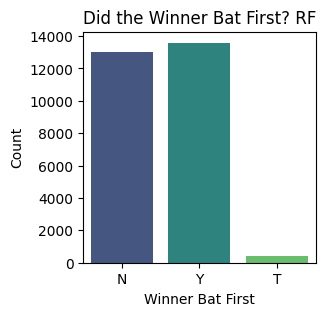

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Did the Winner Bat First? RF')
plt.show()

In [ ]:
y_test_pred_df.value_counts(normalize=True)

Winner Bat First
Y                   0.502739
N                   0.480830
T                   0.016431
Name: proportion, dtype: float64

Mine shows less bias towards the second batting team

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Improved recall significantly, so it's now overpredicting that things are a tie, but that's preferable to incorrectly predicting one of the other two classes.  Also reduced the overfitting.

In [ ]:
#REMEMBER TO CHANGE TERMINAL NODES TO LEAF NODES IN THE PARAM GRIDS

https://github.com/ngoix/scikit-learn/commit/2661da0d3578eda406dcf1867443d9f744165c5f

Use the tuned hyperparameters for a new RF

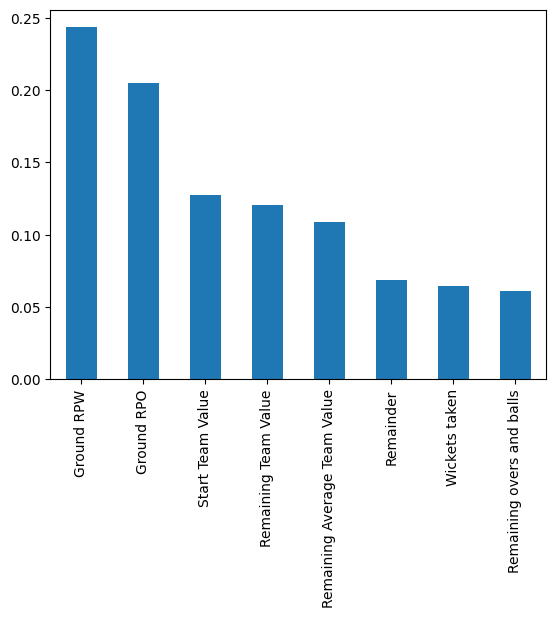

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Challenge with feature selection is that the question here is whether the run rate of the ground, team value and remainder improve the performance rate of wickets taken and remaining overs and balls.

In [70]:
data_train_df = pd.read_csv("data_train_csv")
data_smauto_train_df = pd.read_csv("data_smauto_train_csv")
data_smin_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [72]:
#data_train_df = data_train_df.drop(['Ground RPO', 'Remaining overs and balls'], axis=1, inplace=False)
#data_smauto_train_df = data_smauto_train_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)
data_smin_train_df = data_smin_train_df.drop(['Ground RPO', 'Remaining overs and balls'], axis=1, inplace=False)

data_test_df = data_test_df.drop(['Ground RPO', 'Remaining overs and balls'], axis=1, inplace=False)
data_val_df = data_val_df.drop(['Ground RPO', 'Remaining overs and balls'], axis=1, inplace=False)

KeyError: "['Ground RPO', 'Remaining overs and balls'] not found in axis"

In [73]:
rf(data_train_df, data_test_df, data_val_df, None, None)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Ground RPO
- Remaining overs and balls


Training score: 0.9441379028467496, Testing score: 0.9128117829916365


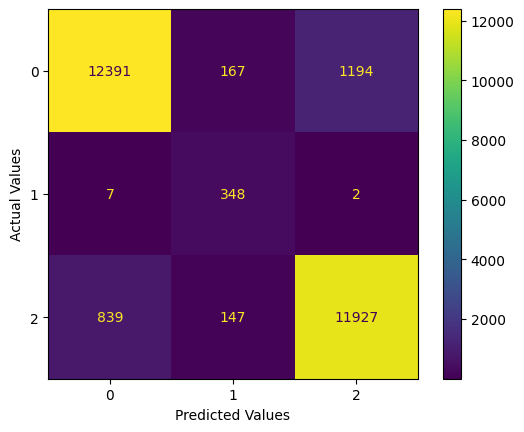

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     13752
           1       0.53      0.97      0.68       357
           2       0.91      0.92      0.92     12913

    accuracy                           0.91     27022
   macro avg       0.79      0.93      0.84     27022
weighted avg       0.92      0.91      0.91     27022



In [ ]:
rf(data_smauto_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9793293315882114, Testing score: 0.9247650062911702


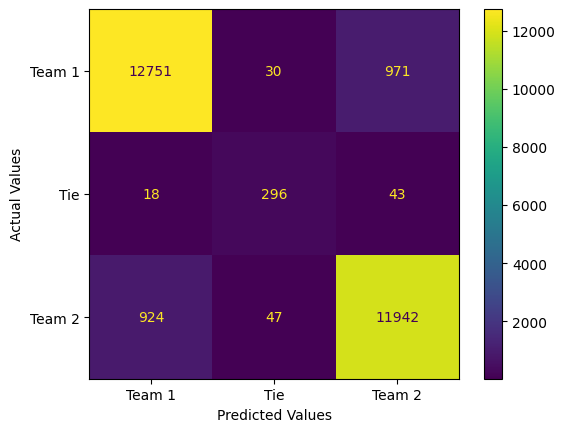

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13752
           1       0.79      0.83      0.81       357
           2       0.92      0.92      0.92     12913

    accuracy                           0.92     27022
   macro avg       0.88      0.89      0.89     27022
weighted avg       0.92      0.92      0.92     27022



In [74]:
rf(data_smin_train_df, data_test_df, data_val_df, None, None)

Autoencoder to extract features?

https://www.datacamp.com/tutorial/random-forests-classifier-python